## Convolutional Neural Networks

An automated learning process most commonly applied to analyzing visual imagery. Creating Models that can identify objects in images.

## What I'll Cover

- Uploading Data to Google Colab
- Gathering / Preparing Images
- Normalizing
- Convolution
- Activation
- Pooling
- Optimizing Performance
- Minimizing Overfitting
- Augmenting Images
- Saving & Loading Models

## How CNN Differs From Previous Classification Models

The models we created before for classification benefited by creating many dense layers. They benefited by creating many different parameters that were connected so that they could see relationships between features and the label.

CNNs seek to find the most important patterns in images. Often with them there are much fewer learnable patterns. 

## Process of Creating a CNN Model

- Collect many images of like size
- Split images into training & test sets
- Discover potential labels / features
- Flatten image into a tensor
- Increase hidden units : Add weightings to get desired output
- Try different activation functions : Helps decide what data is most important
- Try different optimization functions : Optimize by smoothing data to expected results
- Increase learning rate : How much to change the model based on estimated error
- Fit longer : Increase the number of times we try to fit the data

| Hyperparameter | CNN |  |
| :---: | :---: | :---: |
| Input Layer | Processes images |  |
| Convolution Layer | Finds feature weightings | ConvXD |
| Activation | Finds what is most important & adds non-linearity | ReLU |
| Pooling Layer | Reduce dimensions of data by combining outputs | AvgPool2D & MaxPool2D |
| Fully Connected Layer | Connects every neuron in 1 layer to every neuron in another | Dense |
| Receptive Field | Each Neuron receives input from a restrictive area of previous layer |  |
| Output Layer | Takes features & outputs to target labels |  |
| Output Activation | Adds non-linearity to output | Sigmoid & Softmax |

## Using GPU with Google Colab

If execution takes a long time turn on the GPU on Google colab.

- Runtime -> Change Runtime Type -> GPU

In [110]:
# What GPU are we using?
!nvidia-smi

Fri May 27 21:20:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:0A:00.0  On |                  N/A |
| 30%   31C    P8    35W / 350W |  23923MiB / 24576MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Imports

In [111]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Used for accessing files and file names
import pathlib 
import os

## Download Data

I'll be using the food dataset from Kaggle
https://www.kaggle.com/datasets/kmader/food41

You can either put your images folder in the same directory as this file, or use Google Drive or other online storage options with Google Colab.

- I zipped my images folder
- Uploaded the zipped file to Google Drive in a folder called data
- Mount the drive as I show next
- Unzip files

I split up images into training and test folders with a separate folder for hotdog and pizza in each 800 of each in training and 200 in test

## Mount Google Drive

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

## Unzip Files

In [3]:
# Unzip the file
# my_files = zipfile.ZipFile("/content/drive/MyDrive/data/hotdog_pizza.zip")
# my_files.extractall()
# my_files.close()

## Analyze Data


In [112]:
# Function grabs a random image from a directory
def display_random_image(dir, class_type):
    # Define directory to look in
    img_dir = dir + "/" + class_type
    
    # Get files from directory
    files = os.listdir(img_dir)
    
    # Pick a random image from that directory
    img_name = random.choice(files)
    
    # Read in the image
    img = mpimg.imread(img_dir + "/" + img_name)
    
    # Plot image with title & shape
    plt.imshow(img)
    plt.title(class_type)
    plt.axis("off");
    
    # Show the shape of the image
    print(f"Image shape: {img.shape}") 

    # So we can see how the computer sees the image
    # The image is understood as a big tensor with each pixel being
    # represented with RGB color amounts between 0 & 255
    # return img

Image shape: (512, 512, 3)


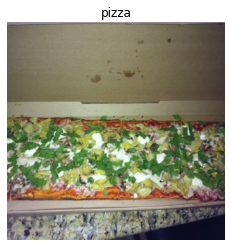

In [113]:
# Show random pizza
display_random_image("hotdog_pizza/",
                    "pizza")

Image shape: (512, 512, 3)


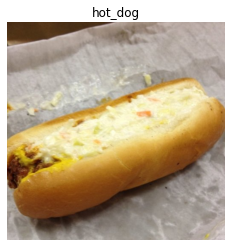

In [114]:
# Show random hotdog
img = display_random_image("hotdog_pizza/",
                    "hot_dog")

## Understanding How CNNs Work

This is a fantastic site for understanding CNNs 
https://poloclub.github.io/cnn-explainer/

CNNs apply filters to input images to learn low level features like lines and then through deeper layers they learn shapes or specific objects.

To identify objects in an image they look for the common shapes they have identified and then provide probabilities of a match. 

These feature maps record precise positions of the features. A negative is that slight changes can require another feature map. This is addressed by down sampling. With down sampling a lower resolution version of an input is created that still has the major structural elements. 

Down sampling can cause problems though because each application of filters produces smaller and smaller feature maps. If we have many layers that decrease the size eventually we can run out of data.

## Each Layer of the Network

- Input Layer : Has 3 channels represented by RGB channels
- Convolutional Layer : Weights extract features that differentiate images
- Activation ReLU : Used to produce non-linear decision boundaries
- Pooling Layer : Summarizes feature maps
- Flatten Layer : Converts a 3D layer into a 1D vector
- Activation Softmax : Softmax is used to scale from multiple tensors into output probabilities

## Understanding Hyperparameters

**Filter :** moves across the image starting in the upper left and proceeds left to right and top to bottom 1 pixel at a time.

**Stride :** refers to the amount of movement between applications of a filter to the input image. This stride is almost always the same movement amount horizontally as well as vertically. You can see that applying a stride will also cause the output feature map to be smaller than the original.

**Pooling :** provides a summarized version of the features detected in the input. They are used so that small changes in the location of a feature in the input will result in a pooled feature map in the same location. Pooling often helps in situations in which your model overfits (Training Accuracy is Rising / Testing Accuracy is Falling). 

Pooling does this by enlarging important features while disregarding very small details which if studied can cause over fitting.

## Prepare Data

In [115]:
# Training & Test Dataset Directories
data_dir = "hotdog_pizza/"

# Import data, turn it into batches of 32 with a size of 256x256
# Batch : We loop through batches of 32 images to minimize 
# memory requirements
# Works with PNG, JPG, BMP, PPM, TIF files

training_data = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                            validation_split=0.2,
                                            subset="training",
                                            batch_size=32, 
                                            image_size=(256,256),
                                            seed=66)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                            validation_split=0.2,
                                            subset="validation",
                                            batch_size=32, 
                                            image_size=(256,256),
                                            seed=66)


Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [116]:
# Get class names
class_names = training_data.class_names
print(class_names)

['hot_dog', 'pizza']


## Normalize the Data

In [117]:
# Normalize pixel values between 0 & 1
# Each pixel is currently values between 0 & 255 for RGB colors
# Neural networks work best with normalized data
# Divide all values by the max value 255
norm_layer = tf.keras.layers.Rescaling(1/255.)

# Apply the division to all data in traing data set
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y))

# Do same for test (validation) dataset
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y))

In [118]:
# Check for normalization
image_batch, labels_batch = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.40686277, 0.42254904, 0.41862747],
        [0.38823533, 0.4039216 , 0.40000004],
        [0.38235298, 0.39803925, 0.39411768],
        ...,
        [0.8196079 , 0.73333335, 0.68235296],
        [0.8235295 , 0.7372549 , 0.6862745 ],
        [0.82745105, 0.73333335, 0.6862745 ]],

       [[0.41862747, 0.43431374, 0.4382353 ],
        [0.4009804 , 0.4166667 , 0.42058825],
        [0.3892157 , 0.40490198, 0.40882355],
        ...,
        [0.82745105, 0.73333335, 0.6862745 ],
        [0.8235295 , 0.7294118 , 0.68235296],
        [0.8235295 , 0.7294118 , 0.68235296]],

       [[0.41176474, 0.427451  , 0.43921572],
        [0.40196082, 0.4176471 , 0.4294118 ],
        [0.38431376, 0.40000004, 0.41176474],
        ...,
        [0.8352942 , 0.7294118 , 0.6862745 ],
        [0.8313726 , 0.7254902 , 0.68235296],
        [0.8313726 , 0.7254902 , 0.68235296]],

       ...,

       [[0.26176473, 0.13627452, 0.05392157],
        [0.26

## Try Non-CNN Model on Data

In [119]:
tf.random.set_seed(66)

model_1 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
optimizer=tf.keras.optimizers.Adam(),
metrics=["accuracy"])

history_1 = model_1.fit(training_data_norm,
                        epochs=5,
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 2s 30ms/step - loss: 0.7068 - accuracy: 0.4956 - val_loss: 0.6973 - val_accuracy: 0.4650
Epoch 2/5
50/50 [==============================] - 1s 28ms/step - loss: 0.6932 - accuracy: 0.5263 - val_loss: 0.6911 - val_accuracy: 0.4625
Epoch 3/5
50/50 [==============================] - 2s 28ms/step - loss: 0.6767 - accuracy: 0.5725 - val_loss: 0.6621 - val_accuracy: 0.6675
Epoch 4/5
50/50 [==============================] - 2s 32ms/step - loss: 0.6515 - accuracy: 0.6494 - val_loss: 0.6559 - val_accuracy: 0.6925
Epoch 5/5
50/50 [==============================] - 2s 38ms/step - loss: 0.6315 - accuracy: 0.6719 - val_loss: 0.6654 - val_accuracy: 0.6575


In [120]:
# Look at all those parameters and still we got terrible results
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 196608)            0         
                                                                 
 dense_22 (Dense)            (None, 4)                 786436    
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


## Non-CNN Model with More Layers

In [121]:
tf.random.set_seed(66)

model_2 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
optimizer=tf.keras.optimizers.Adam(),
metrics=["accuracy"])

history_2 = model_2.fit(training_data_norm,
                        epochs=5,
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 3s 35ms/step - loss: 7.1247 - accuracy: 0.5400 - val_loss: 2.2495 - val_accuracy: 0.5775
Epoch 2/5
50/50 [==============================] - 2s 47ms/step - loss: 1.0061 - accuracy: 0.6325 - val_loss: 0.9765 - val_accuracy: 0.5425
Epoch 3/5
50/50 [==============================] - 4s 81ms/step - loss: 0.6893 - accuracy: 0.6475 - val_loss: 0.5647 - val_accuracy: 0.7025
Epoch 4/5
50/50 [==============================] - 2s 42ms/step - loss: 0.7098 - accuracy: 0.6450 - val_loss: 0.6310 - val_accuracy: 0.6925
Epoch 5/5
50/50 [==============================] - 2s 45ms/step - loss: 0.7666 - accuracy: 0.6519 - val_loss: 0.6060 - val_accuracy: 0.6850


In [122]:
# Better but still not good (19660900 parameters)
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 196608)            0         
                                                                 
 dense_25 (Dense)            (None, 100)               19660900  
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 1)                 101       
                                                                 
Total params: 19,681,201
Trainable params: 19,681,201
Non-trainable params: 0
_________________________________________________________________


## Prepare CNN Model

In [123]:
# Get the total number of batches of 32 images
len(training_data_norm), 1600/32

(50, 50.0)

In [124]:
model_3 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
        kernel_size=3, # can also be (3, 3)
        activation="relu", 
        input_shape=(256, 256, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"), # Filters, Kernel Size, activation
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # Binary activation output layer
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(training_data_norm,
                        epochs=5,
                        # Step through 50 batches of 32
                        steps_per_epoch=len(training_data_norm),
                        # Validate while fitting 
                        validation_data=validation_data_norm, 
                        # step through test data in batches of 32
                        validation_steps=len(validation_data_norm)) 

Epoch 1/5
50/50 [==============================] - 5s 94ms/step - loss: 0.7044 - accuracy: 0.4900 - val_loss: 0.6930 - val_accuracy: 0.4800
Epoch 2/5
50/50 [==============================] - 5s 100ms/step - loss: 0.6866 - accuracy: 0.6044 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 3s 52ms/step - loss: 0.5851 - accuracy: 0.7138 - val_loss: 0.6776 - val_accuracy: 0.6100
Epoch 4/5
50/50 [==============================] - 3s 54ms/step - loss: 0.2754 - accuracy: 0.8969 - val_loss: 0.6951 - val_accuracy: 0.6800
Epoch 5/5
50/50 [==============================] - 3s 54ms/step - loss: 0.1008 - accuracy: 0.9750 - val_loss: 0.9760 - val_accuracy: 0.7000


## Breakdown of Conv2D

Convolution : Math operation on 2 functions that produces a 3rd function that expresses how the shape of one is modified by the other

A Convolutional Layer contains filters (kernels) that are used to recognize patterns present in images. The final output is a vector. 

2D Convolution Layer : 

Conv2D(filters=10, 
    kernel_size=(3,3),
    strides=(1,1),
    padding="same", 
    activation="relu", 
    input_shape=(256, 256, 3))

- Filters : How many filters should pass over input (Typical : 10, 32, 64, 128) More filters = more complex model
- Kernel Size : Defines how big filters are (Typical : 3x3, 5x5, 7x7) Lower Values = Smaller Features / High Values = Larger features
- Padding : If marked same it adds padding so output shape is the same as input shape (If valid output shrinks)
- Strides : Number of steps the filters take while moving across an image (Typical 1 or 2)

The kernel has a defined size with the same height and width in pixels. The kernel slides across the image while performing element wise multiplication using adjusted weightings. Kernel weights start off as random values. The goal is to find edges and features that can be used to make predictions on what objects are in an image. Different features will be found in the different color channels.

Stride defines how many pixels the kernel moves between calculations. If images aren't complex you may be able to set stride to 2. 

Padding makes sure the output feature map is the same size as the input image if assigned "same". If assigned "valid" then the output shape is compressed. It does this by adding padding around the image to make sure each pixel has the opportunity to be in the center of the kernel when calculations are performed.

Activation functions help our network decide what is important data. They receive data and add weightings to it and pass the results to other hidden layers. Depending on the error value the weights are updated

Input shape is 256x256 pixels with 3 color channels.

## Plot Loss & Accuracy

<AxesSubplot:>

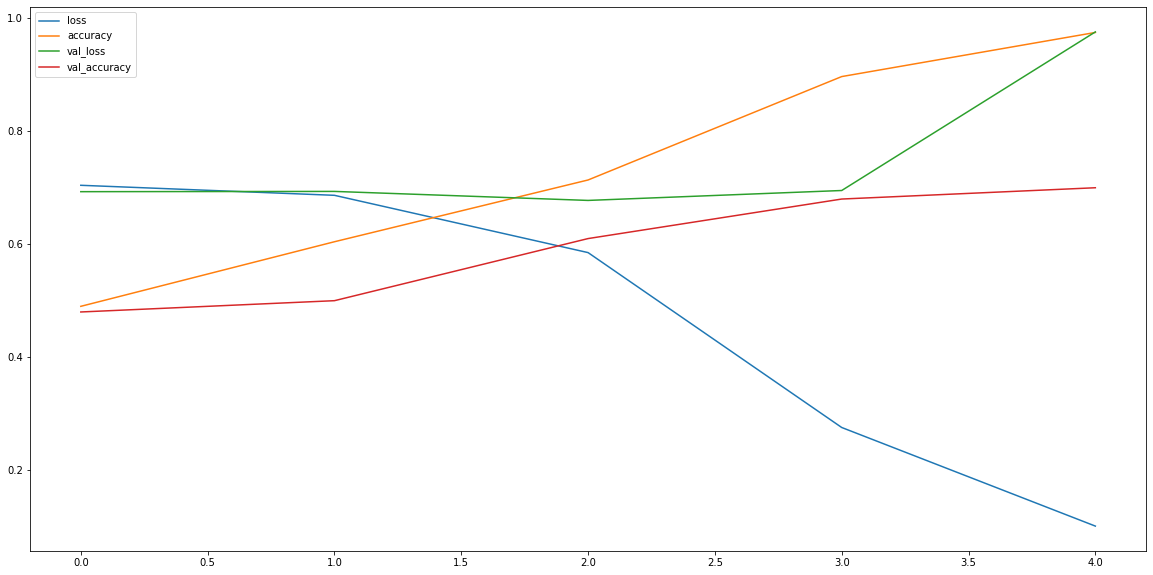

In [125]:
# Plot models training curves
pd.DataFrame(history_3.history).plot(figsize=(20, 10))

- Loss : Falls which is good
- Accuracy : Increases which is good
- Validation Loss : Is increasing which is bad
- Validation Accuracy : Is falling which is also bad

This is a sign that our model has been overfitted. This occurs when the model learns the training data too well. When this happens the model underperforms when analyzing test data.

Imagine that you memorized the answers to all the problems in your text book, but didn't really understand the concepts being taught. When you get the final exam the questions are different, so you flunk the test.

# Reduce Overfitting with Pooling

In [126]:
model_4 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
          kernel_size=3, # Or (3, 3)
          activation="relu", 
          # Input shape (height, width, colour channels)
          input_shape=(256, 256, 3)), 
  MaxPool2D(pool_size=2, # Or (2, 2)
            padding="valid"), # Or 'same'
  Conv2D(10, 3, activation="relu"), # Filters, Kernel Size, activation
  MaxPool2D(), 
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid") # Binary activation output layer
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(training_data_norm,
                        epochs=5,
                        # Step through 50 batches of 32
                        steps_per_epoch=len(training_data_norm), 
                        # Validate while fitting
                        validation_data=validation_data_norm, 
                        # Step through in batches of 32
                        validation_steps=len(validation_data_norm)) 

Epoch 1/5
50/50 [==============================] - 2s 42ms/step - loss: 0.7003 - accuracy: 0.5475 - val_loss: 0.6502 - val_accuracy: 0.6575
Epoch 2/5
50/50 [==============================] - 2s 47ms/step - loss: 0.6107 - accuracy: 0.6812 - val_loss: 0.5453 - val_accuracy: 0.7325
Epoch 3/5
50/50 [==============================] - 2s 39ms/step - loss: 0.5388 - accuracy: 0.7256 - val_loss: 0.5873 - val_accuracy: 0.6725
Epoch 4/5
50/50 [==============================] - 2s 35ms/step - loss: 0.5215 - accuracy: 0.7406 - val_loss: 0.4761 - val_accuracy: 0.7625
Epoch 5/5
50/50 [==============================] - 3s 41ms/step - loss: 0.4582 - accuracy: 0.7906 - val_loss: 0.4496 - val_accuracy: 0.8125


<AxesSubplot:>

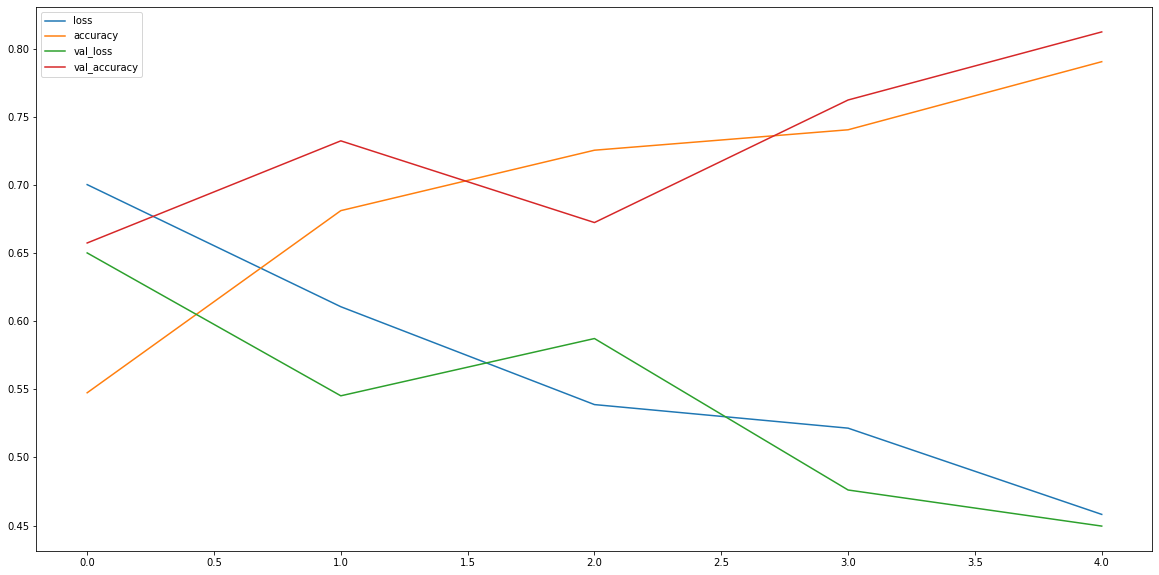

In [127]:
# Plot models training curves
pd.DataFrame(history_4.history).plot(figsize=(20, 10))

Better but there is till overfitting because validation loss and accuracy are going the wrong way

## Add More Data with Augmentation to Avoid Overfitting

Increasing the amount of data by adding slightly modified versions of existing data. Images are rotated, cropped, sheared, zoomed, flipped, etc.

In [128]:
# Augmenting this data doesn't change the images, but instead 
# loads here when executed

data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [129]:
model_5 = tf.keras.models.Sequential([
    data_augmentation,
    Conv2D(filters=10, 
          kernel_size=3, # Or (3, 3)
          activation="relu", 
          # Input shape (height, width, colour channels)
          input_shape=(256, 256, 3)), 
    MaxPool2D(pool_size=2, # Or (2, 2)
            padding="valid"), # Or 'same'
    Conv2D(10, 3, activation="relu"), # Filters, Kernel Size, activation
    MaxPool2D(), 
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid") # Binary activation output layer
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(training_data_norm,
                        epochs=20,
                        # Step through 50 batches of 32
                        steps_per_epoch=len(training_data_norm), 
                        # Validate while fitting
                        validation_data=validation_data_norm, 
                        # Step through in batches of 32
                        validation_steps=len(validation_data_norm)) 

Epoch 1/20
50/50 [==============================] - 3s 50ms/step - loss: 0.6944 - accuracy: 0.4975 - val_loss: 0.6684 - val_accuracy: 0.6325
Epoch 2/20
50/50 [==============================] - 3s 49ms/step - loss: 0.6316 - accuracy: 0.6625 - val_loss: 0.5756 - val_accuracy: 0.7200
Epoch 3/20
50/50 [==============================] - 2s 45ms/step - loss: 0.5944 - accuracy: 0.6837 - val_loss: 0.5279 - val_accuracy: 0.7425
Epoch 4/20
50/50 [==============================] - 2s 41ms/step - loss: 0.5388 - accuracy: 0.7344 - val_loss: 0.5048 - val_accuracy: 0.7650
Epoch 5/20
50/50 [==============================] - 2s 42ms/step - loss: 0.5225 - accuracy: 0.7475 - val_loss: 0.4839 - val_accuracy: 0.7725
Epoch 6/20
50/50 [==============================] - 3s 48ms/step - loss: 0.5088 - accuracy: 0.7575 - val_loss: 0.4636 - val_accuracy: 0.7950
Epoch 7/20
50/50 [==============================] - 3s 49ms/step - loss: 0.5096 - accuracy: 0.7412 - val_loss: 0.4590 - val_accuracy: 0.7875
Epoch 8/20
50

<AxesSubplot:>

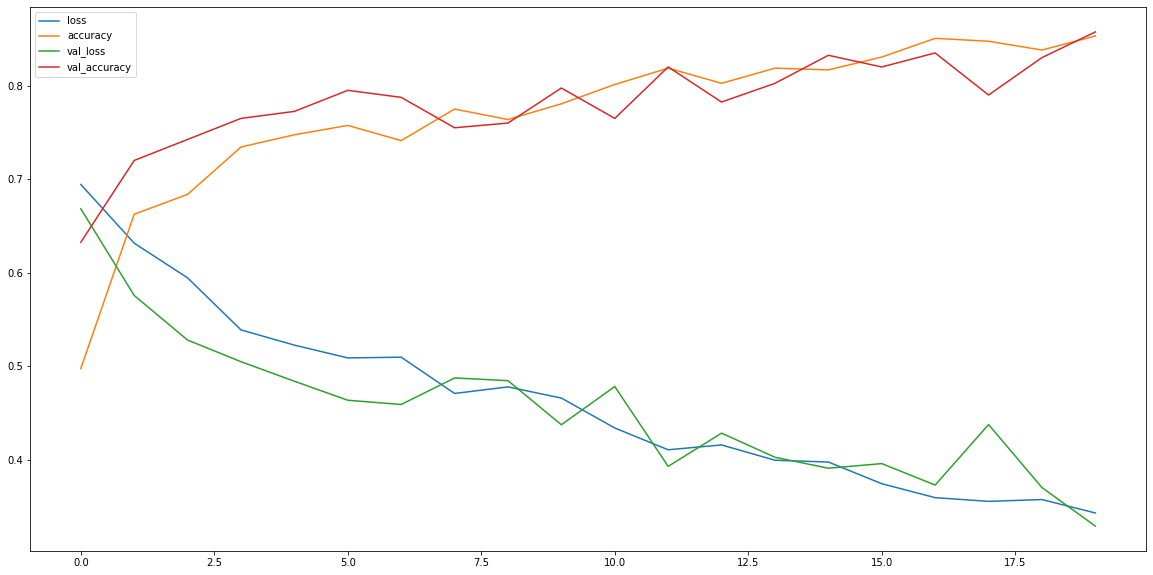

In [130]:
# Plot models training curves
pd.DataFrame(history_5.history).plot(figsize=(20, 10))

We have conquered overfitting with both our validation loss and accuracy outperforming the training data!

## How Can We Further Improve Accuracy?

- Increase the number of model layers (e.g. add more convolutional layers).
- Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
- Train for longer (more epochs).
- Finding an ideal learning rate.
- Get more data (give the model more opportunities to learn)

## Make Prediction Using Custom Image

(-0.5, 255.5, 255.5, -0.5)

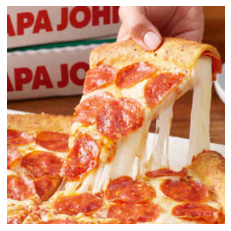

In [131]:
# With Google colab
# my_pizza = mpimg.imread("/content/drive/MyDrive/data/my_pizza.jpg")

my_pizza = mpimg.imread("my_pizza.jpg")
plt.imshow(my_pizza)
plt.axis(False)

In [132]:
my_pizza.shape

(256, 256, 3)

In [133]:
# This doesn't work because the dimensions are different
# model_5.predict(my_pizza)

In [134]:
# Data isn't normalized and we should also make 
# sure it is the right dimensions
my_pizza

array([[[201, 171, 161],
        [201, 171, 161],
        [201, 171, 161],
        ...,
        [153,  75,  26],
        [152,  74,  25],
        [152,  74,  25]],

       [[200, 170, 160],
        [200, 170, 160],
        [200, 170, 160],
        ...,
        [153,  75,  26],
        [152,  74,  25],
        [152,  74,  25]],

       [[202, 172, 162],
        [202, 172, 162],
        [201, 171, 161],
        ...,
        [153,  75,  26],
        [153,  75,  26],
        [152,  74,  25]],

       ...,

       [[244, 134,  83],
        [244, 159, 105],
        [232, 142, 107],
        ...,
        [186,  61,   0],
        [190,  72,  10],
        [201,  87,  25]],

       [[239, 106,  49],
        [228, 122,  74],
        [219, 112,  76],
        ...,
        [190,  73,   4],
        [200,  96,  25],
        [219, 123,  49]],

       [[237,  82,  28],
        [217,  94,  53],
        [210,  95,  64],
        ...,
        [201,  90,  18],
        [217, 121,  44],
        [241, 156,  76]]

## Normalize and Resize

In [135]:
# With Google Colab
# my_pizza = tf.io.read_file("/content/drive/MyDrive/data/my_pizza.jpg")

# Read in image
my_pizza = tf.io.read_file("my_pizza.jpg")

# Turn file into a tensor
my_pizza = tf.image.decode_image(my_pizza)

# Resize image
my_pizza = tf.image.resize(my_pizza, size=[256, 256])

# Normalize data
my_pizza = my_pizza / 255

my_pizza

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.78431374, 0.6745098 , 0.6313726 ],
        [0.78431374, 0.6745098 , 0.6313726 ],
        [0.78039217, 0.67058825, 0.627451  ],
        ...,
        [0.5921569 , 0.29411766, 0.09803922],
        [0.5921569 , 0.29411766, 0.09803922],
        [0.5921569 , 0.29411766, 0.09803922]],

       [[0.78039217, 0.67058825, 0.627451  ],
        [0.78039217, 0.67058825, 0.627451  ],
        [0.7764706 , 0.6666667 , 0.62352943],
        ...,
        [0.5921569 , 0.29411766, 0.09803922],
        [0.5921569 , 0.29411766, 0.09803922],
        [0.5921569 , 0.29411766, 0.09803922]],

       [[0.7882353 , 0.6784314 , 0.63529414],
        [0.7882353 , 0.6784314 , 0.63529414],
        [0.78431374, 0.6745098 , 0.6313726 ],
        ...,
        [0.59607846, 0.29803923, 0.10196079],
        [0.5921569 , 0.29411766, 0.09803922],
        [0.5921569 , 0.29411766, 0.09803922]],

       ...,

       [[0.9490196 , 0.5294118 , 0.3254902 ],
        [0.94

In [136]:
# Tells us how likely the image belongs to a class in our model
prediction = model_5.predict(tf.expand_dims(my_pizza, axis=0))
prediction

array([[0.9765802]], dtype=float32)

In [137]:
# Predicts which one, but I want a name
# Here are the classes
class_names

['hot_dog', 'pizza']

In [138]:
predicted_class = class_names[int(tf.round(prediction))]
predicted_class

'pizza'

## Save & Load Model

In [139]:
# Save Model
model_5.save("Binary_CNN_Model_5")

INFO:tensorflow:Assets written to: Binary_CNN_Model_5\assets


In [140]:
# Load trained model
saved_model_5 = tf.keras.models.load_model("Binary_CNN_Model_5")
saved_model_5.evaluate(validation_data_norm)

13/13 [==============================] - 1s 10ms/step - loss: 0.3290 - accuracy: 0.8575


[0.3289584219455719, 0.8575000166893005]